In [28]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [29]:
dataset = pd.read_csv('C:\\Users\\ANUSHA\\Downloads\\SVM Dataset.csv')
print(dataset.head())

   ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4  1/60          1         0   
1   2   45          19      34     90089       3  1/50          1         0   
2   3   39          15      11     94720       1  1/00          1         0   
3   4   35           9     100     94112       1  2/70          2         0   
4   5   35           8      45     91330       4  1/00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [30]:
X = dataset[['Age', 'Income']].values
y = dataset['Personal Loan'].values

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [32]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

In [34]:
accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
print(f"Accuracy (Linear Kernel): {accuracy_linear * 100:.2f}%")
print("Confusion Matrix (Linear Kernel):")
print(conf_matrix_linear)

Accuracy (Linear Kernel): 91.00%
Confusion Matrix (Linear Kernel):
[[910   0]
 [ 90   0]]


In [35]:
smote = SMOTE(random_state=0)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Train the SVM model with linear kernel on resampled data
model_linear_resampled = SVC(kernel='linear')
model_linear_resampled.fit(X_res, y_res)
y_pred_linear_resampled = model_linear_resampled.predict(X_test)

accuracy_linear_resampled = accuracy_score(y_test, y_pred_linear_resampled)
conf_matrix_linear_resampled = confusion_matrix(y_test, y_pred_linear_resampled)
print(f"Accuracy (Linear Kernel after SMOTE): {accuracy_linear_resampled * 100:.2f}%")
print("Confusion Matrix (Linear Kernel after SMOTE):")
print(conf_matrix_linear_resampled)

Accuracy (Linear Kernel after SMOTE): 85.40%
Confusion Matrix (Linear Kernel after SMOTE):
[[771 139]
 [  7  83]]


Accuracy (RBF Kernel): 91.00%
Confusion Matrix (RBF Kernel):
[[910   0]
 [ 90   0]]


C:\Users\ANUSHA\AppData\Local\Temp\ipykernel_5948\858748503.py:32: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', marker='x', label='Test Data')


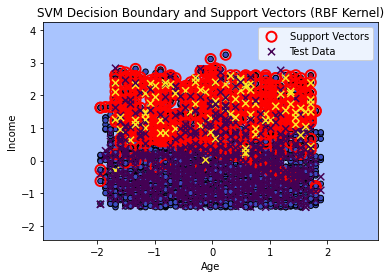

In [36]:
model_rbf = SVC(kernel='rbf', C=1, gamma=0.1)
model_rbf.fit(X_train, y_train)
y_pred_rbf = model_rbf.predict(X_test)

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
print(f"Accuracy (RBF Kernel): {accuracy_rbf * 100:.2f}%")
print("Confusion Matrix (RBF Kernel):")
print(conf_matrix_rbf)

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
# Predict class labels for all points
Z = model_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, edgecolor='k', cmap=plt.cm.coolwarm)

# Plotting the support vectors
plt.scatter(model_rbf.support_vectors_[:, 0], model_rbf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='red', linewidth=2, label="Support Vectors")

# Plotting test data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=50, edgecolor='k', marker='x', label='Test Data')

plt.title('SVM Decision Boundary and Support Vectors (RBF Kernel)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

In [37]:
# Classification Report
print("Classification Report (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf))

Classification Report (RBF Kernel):
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       910
           1       0.00      0.00      0.00        90

    accuracy                           0.91      1000
   macro avg       0.46      0.50      0.48      1000
weighted avg       0.83      0.91      0.87      1000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
# Train the SVM model with RBF kernel (with probability enabled)
model_rbf = SVC(kernel='rbf', C=1, gamma=0.1, probability=True)  # Enable probability estimation
model_rbf.fit(X_train, y_train)

def predict_purchase(age, income):
   
    input_scaled = scaler.transform([[age, income]])
    
    prediction = model_rbf.predict(input_scaled)[0]
    probability = model_rbf.predict_proba(input_scaled)[0][1]  # Get the probability of class 1 (Purchased)
    
    if prediction == 1:
        print(f"Prediction: Likely to Purchase (Confidence: {probability * 100:.2f}%)")
    else:
        print(f"Prediction: Unlikely to Purchase (Confidence: {(1 - probability) * 100:.2f}%)")

# prediction
age_input = float(input("Enter Age: "))
income_input = float(input("Enter Income: "))
predict_purchase(age_input, income_input)


Enter Age: 35
Enter Income: 45
Prediction: Unlikely to Purchase (Confidence: 93.86%)
